# 📘 Exploratory Data Analysis Report

## 🧾 Project Title  
**Store Sales – Time Series Forecasting**

---

## 📂 Source  
- **Competition**: [Kaggle: Store Sales - Time Series Forecasting](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/)
- **Hosted by**: Corporación Favorita, Ecuador  
- **Objective**: Forecast daily sales for combinations of `store_nbr` and `product family`  
- **Target Variable**: `sales` (unit sales per store-family-day)

---

## 📊 Dataset Files

| File Name              | Description                                                     |
|------------------------|-----------------------------------------------------------------|
| `train.csv`            | Historical sales data (2013-2017)                               |
| `test.csv`             | Future dates to forecast (15 days)                              |
| `stores.csv`           | Store metadata (city, state, type, cluster)                     |
| `transactions.csv`     | Daily number of transactions per store                          |
| `oil.csv`              | Daily Ecuador oil prices (economic indicator)                   |
| `holidays_events.csv`  | National/local holidays and events info                         |

---

## 👨‍💻 Author  
- **Name**: *Hasnain Yaqoob*  
- **LinkedIn**: [linkedin](https://linkedin.com/in/hasnain-yaqoob-)  
- **Kaggle**: [kaggle](https://kaggle.com/hasnainyaqooob)  
- **GitHub**: [github](https://github.com/hasnainyaqub)

---

## 🧠 Goal of EDA  
- Understand sales behavior over time and across stores and families  
- Identify trends, seasonality, promotions impact, and external effects (oil prices, holidays)  
- Detect data quality issues and prepare insights for modeling

---

## ✅ EDA Steps Overview

### 1. Load and Inspect Data  
- Load all datasets  
- View structure, types, head, tail, and unique values  

### 2. Check for Missing Values  
- Visualize and summarize missing values in each dataset  
- Decide on filling or dropping strategies  

### 3. Extract Date Features  
- From `date` columns extract: year, month, day, weekday, week number, is_weekend  

### 4. Analyze Target Variable (`sales`)  
- Plot distribution  
- Check for skewness and outliers  
- Summarize statistics  

### 5. Visualize Time Series Trends  
- Plot total daily sales  
- Visualize trends by year, month, and week  

### 6. Store-Level Sales Analysis  
- Group sales by `store_nbr`  
- Compare performance across different store types and clusters  

### 7. Product Family Sales Analysis  
- Group and compare sales across different `family` categories  
- Spot trends in specific product types  

### 8. Effect of Promotions  
- Compare sales during promotions vs non-promotions  
- Evaluate impact across stores and families  

### 9. Enrich Dataset with External Metadata  
- Merge oil prices, holidays, transactions, and store information into the main dataset.  
- This creates a unified view with all important context for modeling.

### 10. Correlation, Seasonality, and Trend Analysis  
- Explore relationships between sales and features like oil, promotions, and transactions.  
- Identify weekly and monthly seasonality patterns and long-term sales trends.

### 11. Outlier Detection and Modeling Insights  
- Detect anomalies in sales and explain them using holidays or events.  
- Summarize key data patterns and predictive features to guide model design.

---

*End of EDA Outline*


# EDA
## EDA Step 1: Load and Inspect Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [102]:
!unzip /content/store-sales-time-series-forecasting.zip

unzip:  cannot find or open /content/store-sales-time-series-forecasting.zip, /content/store-sales-time-series-forecasting.zip.zip or /content/store-sales-time-series-forecasting.zip.ZIP.


In [3]:
# read the train dataset
train_df = pd.read_csv('train.csv')
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
# read the test dataset
test_df = pd.read_csv('test.csv')
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [5]:
# read the stores dataset
stores_df = pd.read_csv('stores.csv')
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [6]:
# read the transactions dataset
transactions_df = pd.read_csv('transactions.csv')
transactions_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [7]:
# read the oil dataset
oil_df = pd.read_csv('oil.csv')
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [8]:
# read the holidays dataset
holidays_df = pd.read_csv('holidays_events.csv')
holidays_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [9]:
# print the shape of the train dataset
print(f"Train data shape: {train_df.shape}")
# print the shape of the test dataset
print(f"Test data shape: {test_df.shape}")
# print the shape of the stores dataset
print(f"Stores data shape: {stores_df.shape}")
# print the shape of the transactions dataset
print(f"Transactions data shape: {transactions_df.shape}")
# print the shape of the oil dataset
print(f"Oil data shape: {oil_df.shape}")
# print the shape of the holidays dataset
print(f"Holidays data shape: {holidays_df.shape}")

Train data shape: (3000888, 6)
Test data shape: (28512, 5)
Stores data shape: (54, 5)
Transactions data shape: (83488, 3)
Oil data shape: (1218, 2)
Holidays data shape: (350, 6)


## EDA Step 2: Check for Missing Values

In [10]:
# let's check the missing values in the data
print(f"Missing values in the train dataset: {train_df.isnull().sum().sum()}")
print(f"Missing values in the test dataset: {test_df.isnull().sum().sum()}")
print(f"Missing values in the stores dataset: {stores_df.isnull().sum().sum()}")
print(f"Missing values in the transactions dataset: {transactions_df.isnull().sum().sum()}")
print(f"Missing values in the oil dataset: {oil_df.isnull().sum().sum()}")
print(f"Missing values in the holidays dataset: {holidays_df.isnull().sum().sum()}")

Missing values in the train dataset: 0
Missing values in the test dataset: 0
Missing values in the stores dataset: 0
Missing values in the transactions dataset: 0
Missing values in the oil dataset: 43
Missing values in the holidays dataset: 0


In [11]:
# we found null values in the oil dataset let's check
oil_df.isna().sum()

date           0
dcoilwtico    43
dtype: int64

Oil markets are closed on weekends and some holidays, so no data is recorded on those days

Some holidays may cause official oil price reports to be skipped

In [12]:
oil_df['dcoilwtico'] = oil_df['dcoilwtico'].ffill().bfill()

## EDA Step 3: Extract Date Features

In [13]:
# First make sure all date columns are parsed as datetime
# List of all DataFrames that contain a 'date' column
date_dfs = [train_df, test_df, oil_df, holidays_df, transactions_df]

for df in date_dfs:
    df['date'] = pd.to_datetime(df['date'])

# Then extract features safely
for df in date_dfs:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['weekday'] = df['date'].dt.weekday
    df['week'] = df['date'].dt.isocalendar().week
    df['quarter'] = df['date'].dt.quarter
    df['day_of_year'] = df['date'].dt.dayofyear
    df['is_weekend'] = df['weekday'].isin([5, 6])

## Step 4 & 5: Analyze Target Variable (sales) | Visualize Time Series Trends

In [14]:
# Basic stats
print(train_df['sales'].describe())

count    3.000888e+06
mean     3.577757e+02
std      1.101998e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.958473e+02
max      1.247170e+05
Name: sales, dtype: float64


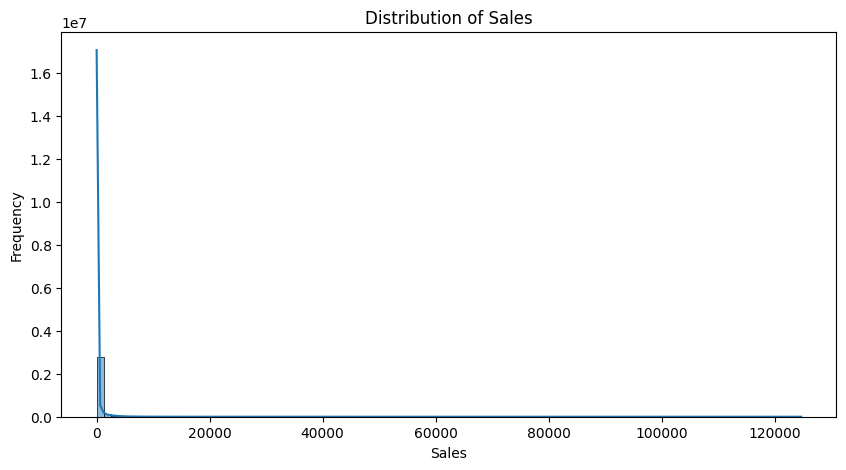

In [15]:
# Distribution of Sales
plt.figure(figsize=(10, 5))
sns.histplot(train_df['sales'], bins=100, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

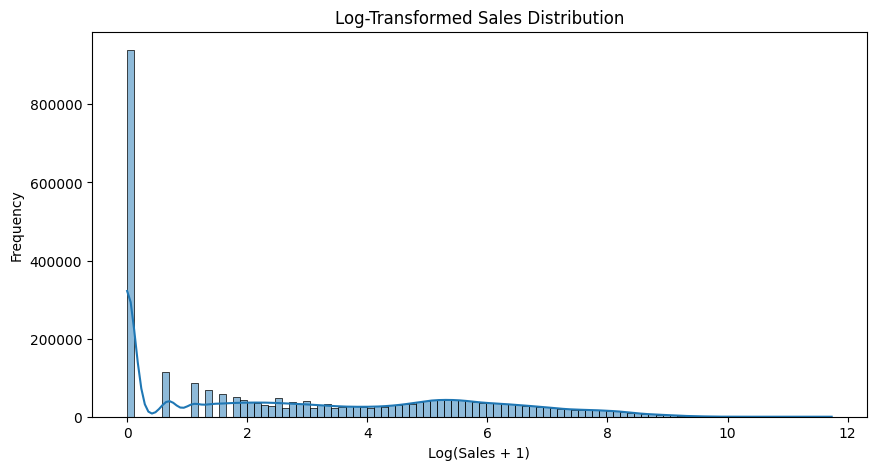

In [16]:
# Distribution of Log-Transformed Sales
# Add a small value to avoid log(0)
train_df['log_sales'] = np.log1p(train_df['sales'])

plt.figure(figsize=(10, 5))
sns.histplot(train_df['log_sales'], bins=100, kde=True)
plt.title('Log-Transformed Sales Distribution')
plt.xlabel('Log(Sales + 1)')
plt.ylabel('Frequency')
plt.show()


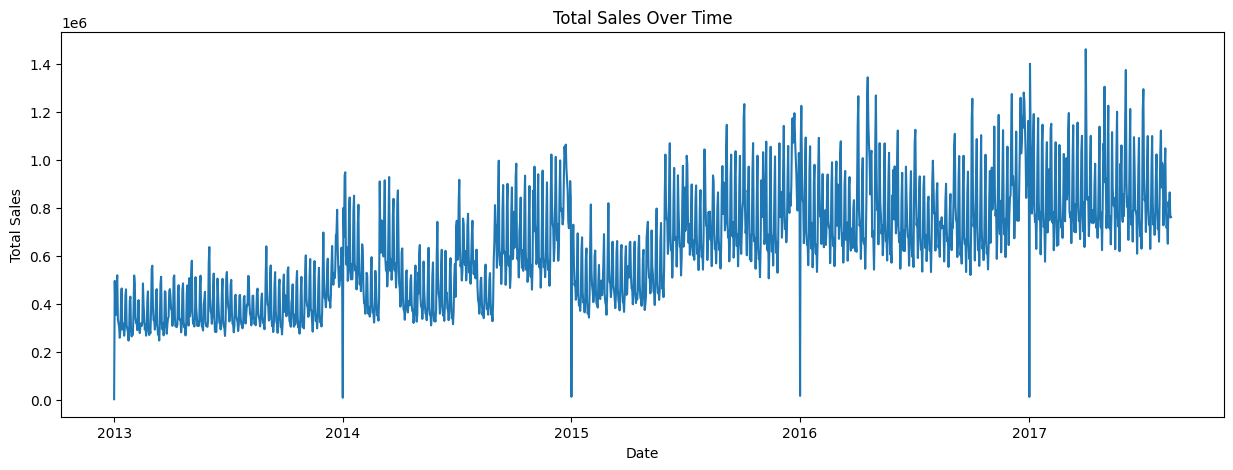

In [17]:
# Sales over time
# Daily total sales
daily_sales = train_df.groupby('date')['sales'].sum().reset_index()

plt.figure(figsize=(15, 5))
sns.lineplot(data=daily_sales, x='date', y='sales')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


In [18]:
# Ensure 'date' is in datetime format
train_df['date'] = pd.to_datetime(train_df['date'])

# Create the 'weekday' column [0 = Monday, 6 = Sunday]
train_df['weekday'] = train_df['date'].dt.weekday


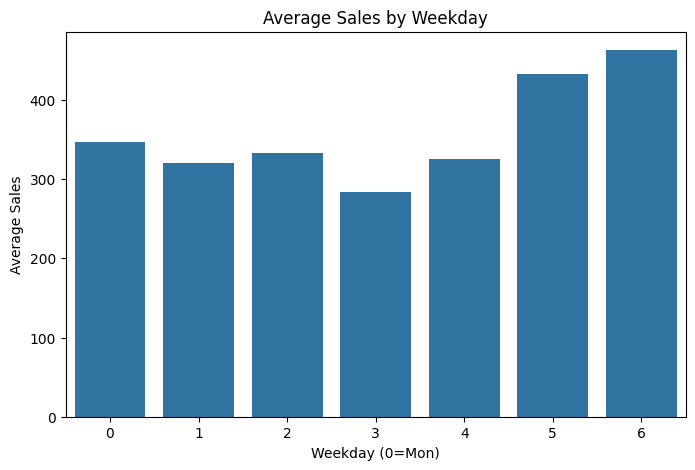

In [19]:
# Sales by Day of Week
# Sales # Average sales by weekday (0 = Monday)
weekday_sales = train_df.groupby('weekday')['sales'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=weekday_sales, x='weekday', y='sales')
plt.title('Average Sales by Weekday')
plt.xlabel('Weekday (0=Mon)')
plt.ylabel('Average Sales')
plt.show()


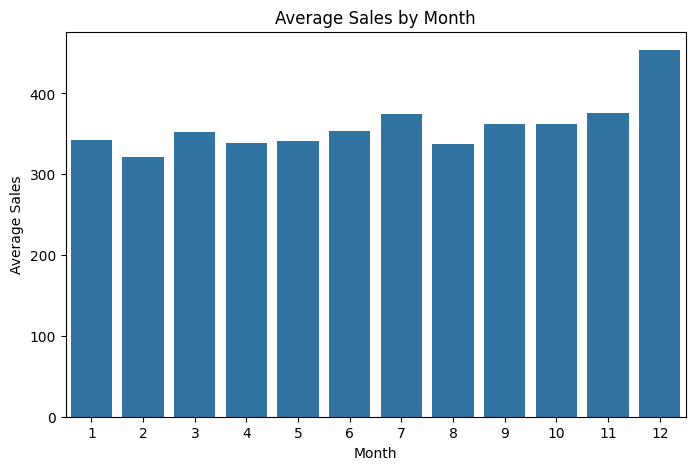

In [20]:
# sales by month
monthly_sales = train_df.groupby('month')['sales'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=monthly_sales, x='month', y='sales')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()


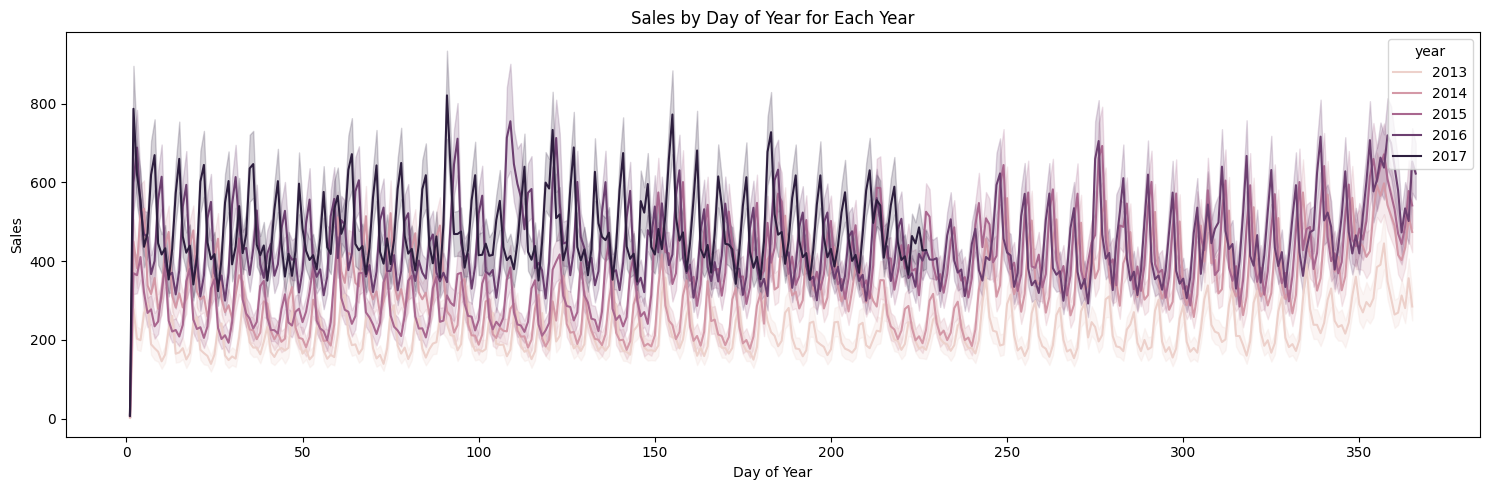

In [21]:
# Sales by Year (Side-by-Side or Overlay)
# Add 'year' if not already added
train_df['year'] = train_df['date'].dt.year

plt.figure(figsize=(15, 5))
sns.lineplot(data=train_df, x='day_of_year', y='sales', hue='year')
plt.title('Sales by Day of Year for Each Year')
plt.xlabel('Day of Year')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


Target (sales) Has Strong Seasonality:
Here’s what we’ve discovered from EDA:

Weekly Seasonality

Sundays show the highest average sales
Likely because more people shop on weekends

Yearly Seasonality

December has peak sales
Possibly due to Christmas, New Year, or end-of-year bonuses

#  Step 6: Store-Level Sales Analysis

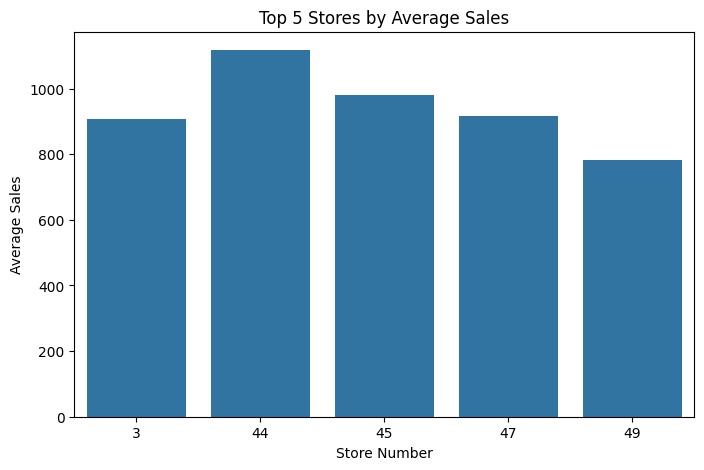

In [22]:
# Group Sales by store_nbr
store_sales = train_df.groupby('store_nbr')['sales'].mean().reset_index()

# Sort by sales
store_sales.sort_values('sales', ascending=False, inplace=True)

store_sales.head()
# plot the top 5 stores
plt.figure(figsize=(8, 5))
sns.barplot(data=store_sales.head(5), x='store_nbr', y='sales')
plt.title('Top 5 Stores by Average Sales')
plt.xlabel('Store Number')
plt.ylabel('Average Sales')
plt.show()


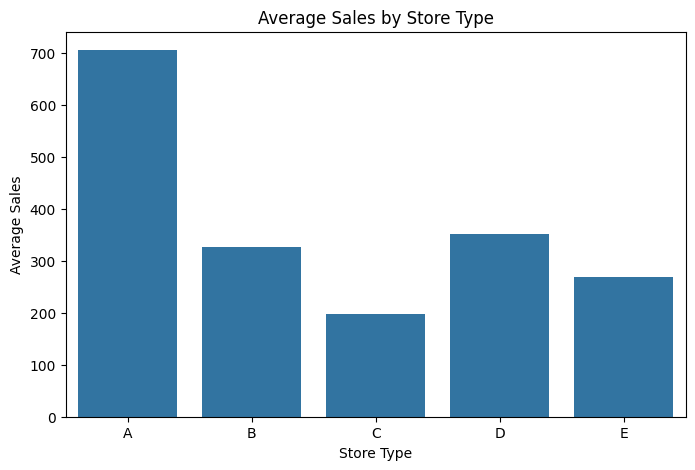

In [23]:
# Compare Sales by store_type
# Merge store type info into train_df
train_merged = train_df.merge(stores_df, on='store_nbr', how='left')

# Group by store type
type_sales = train_merged.groupby('type')['sales'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=type_sales, x='type', y='sales')
plt.title('Average Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.show()

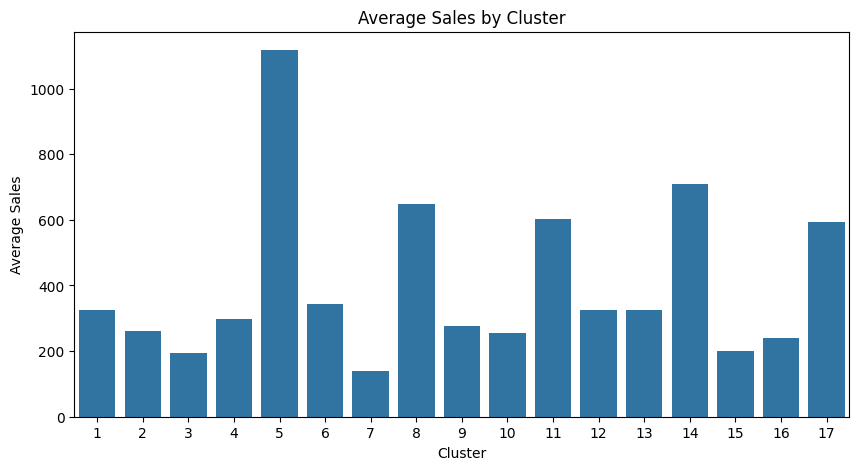

In [24]:
# Compare Sales by cluster
cluster_sales = train_merged.groupby('cluster')['sales'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=cluster_sales, x='cluster', y='sales')
plt.title('Average Sales by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Sales')
plt.show()


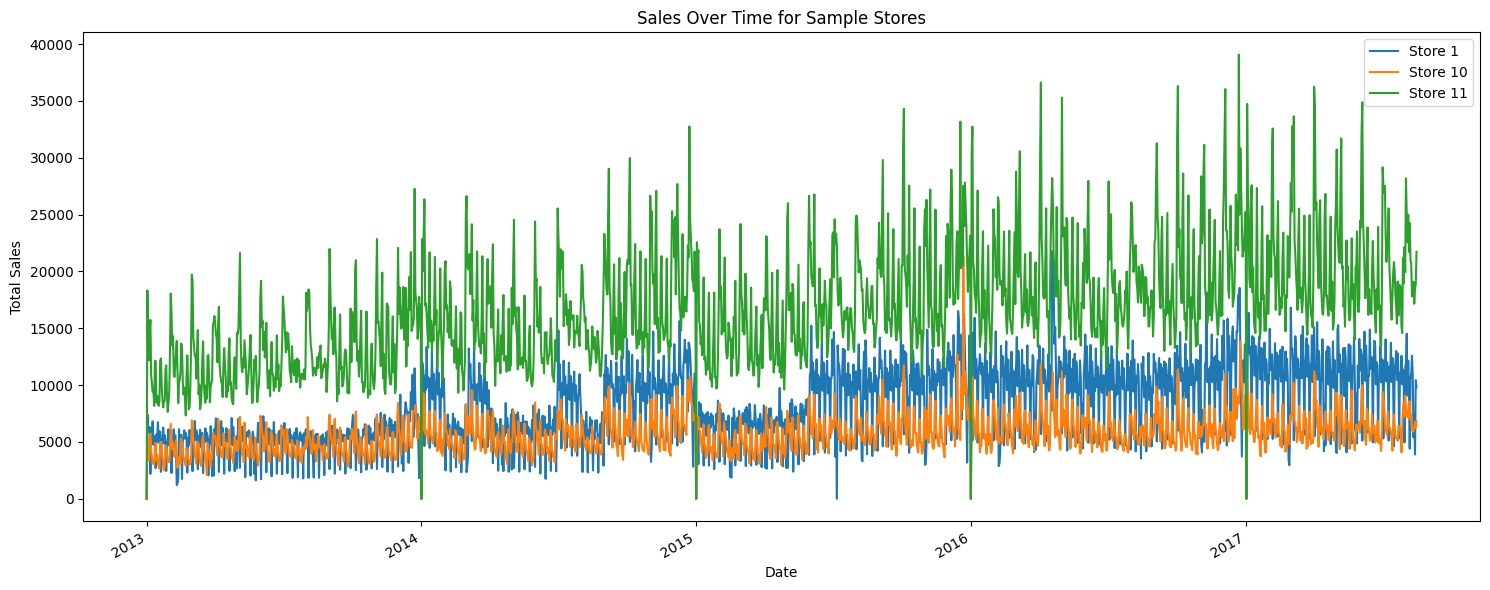

In [25]:
# Visualize Store Sales Over Time
# Choose a few store_nbrs for clarity
top_stores = train_df['store_nbr'].unique()[:3]  # first 3 stores

plt.figure(figsize=(15, 6))
for store in top_stores:
    store_data = train_df[train_df['store_nbr'] == store].groupby('date')['sales'].sum()
    store_data.plot(label=f'Store {store}')

plt.title('Sales Over Time for Sample Stores')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()


## Step 7: Product Family-Level Analysis

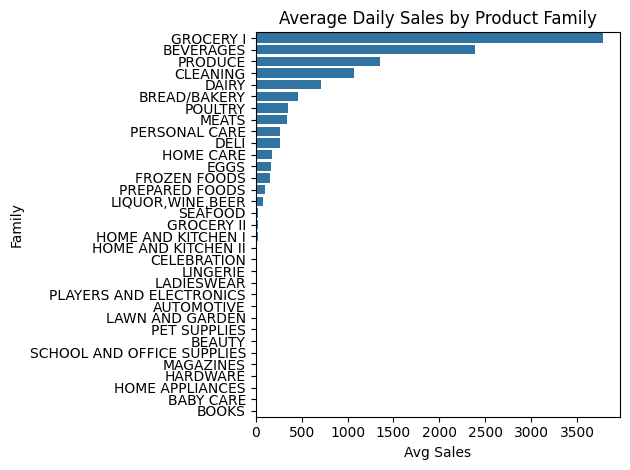

In [26]:
# Average Sales per Family
family_avg_sales = train_df.groupby('family')['sales'].mean().reset_index()
family_avg_sales = family_avg_sales.sort_values(by='sales', ascending=False)

sns.barplot(data=family_avg_sales, x='sales', y='family')
plt.title('Average Daily Sales by Product Family')
plt.xlabel('Avg Sales')
plt.ylabel('Family')
plt.tight_layout()
plt.show()


In [27]:
# Identify Top and Bottom Product Families
top_families = family_avg_sales['family'].head(5).tolist()
bottom_families = family_avg_sales['family'].tail(5).tolist()

print("Top Product Families:")
print(top_families)

print("\nBottom Product Families:")
print(bottom_families)

Top Product Families:
['GROCERY I', 'BEVERAGES', 'PRODUCE', 'CLEANING', 'DAIRY']

Bottom Product Families:
['MAGAZINES', 'HARDWARE', 'HOME APPLIANCES', 'BABY CARE', 'BOOKS']


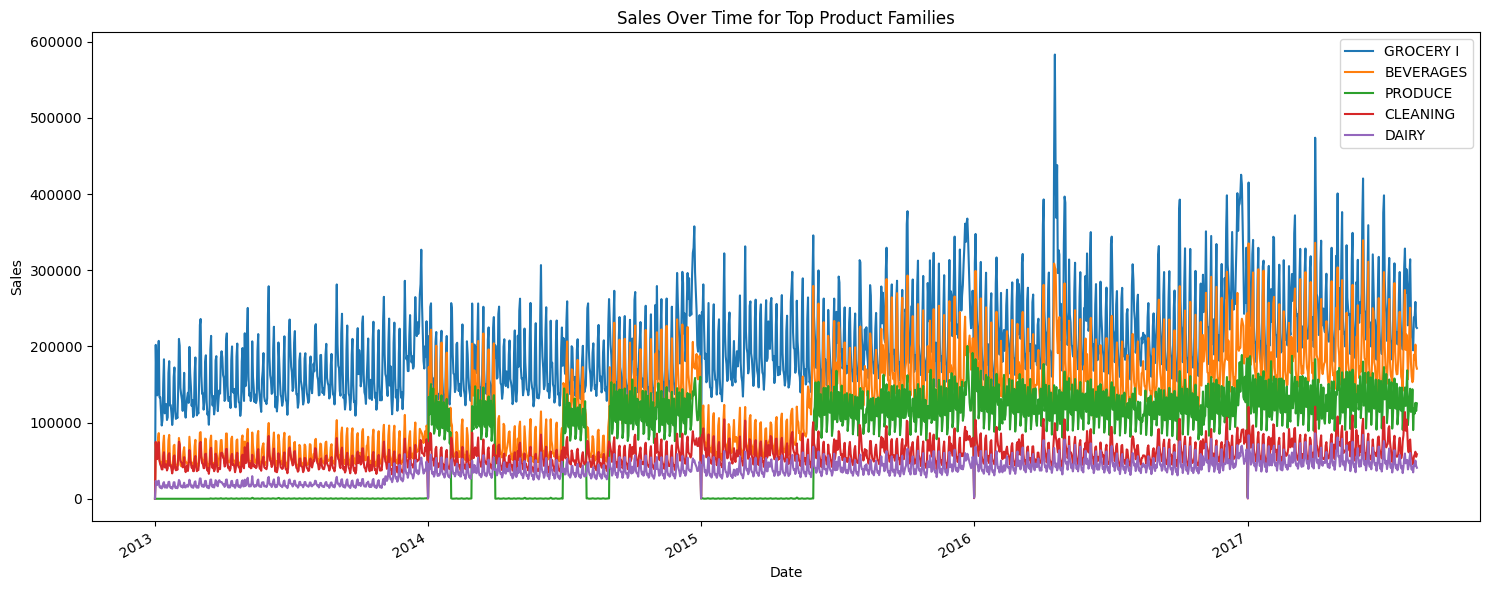

In [28]:
# Top Product Families
plt.figure(figsize=(15, 6))
for family in top_families:
    ts = train_df[train_df['family'] == family].groupby('date')['sales'].sum()
    ts.plot(label=family)

plt.title('Sales Over Time for Top Product Families')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()


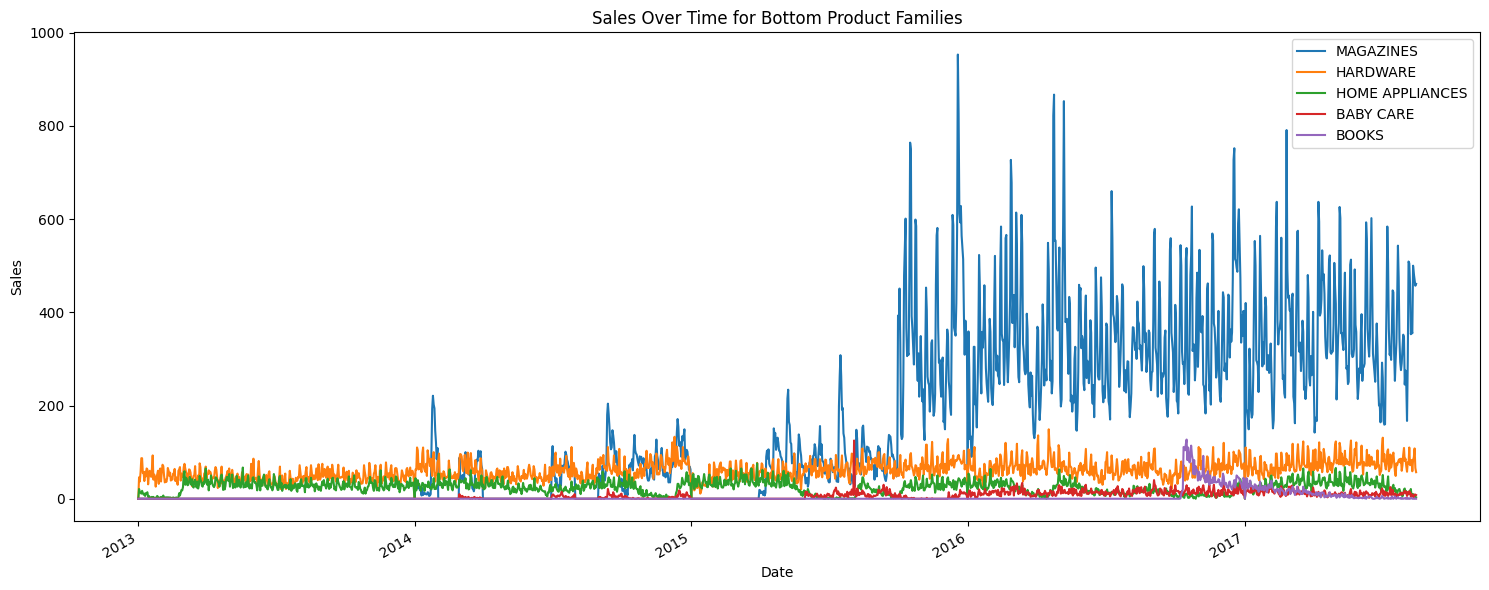

In [29]:
# Bottom Product Families
plt.figure(figsize=(15, 6))
for family in bottom_families:
    ts = train_df[train_df['family'] == family].groupby('date')['sales'].sum()
    ts.plot(label=family)

plt.title('Sales Over Time for Bottom Product Families')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()


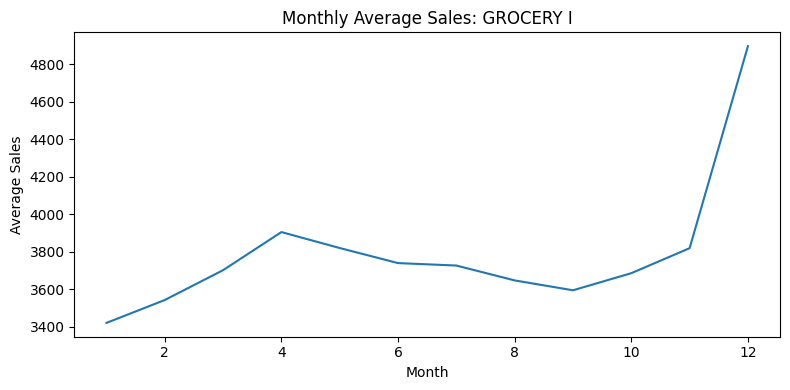

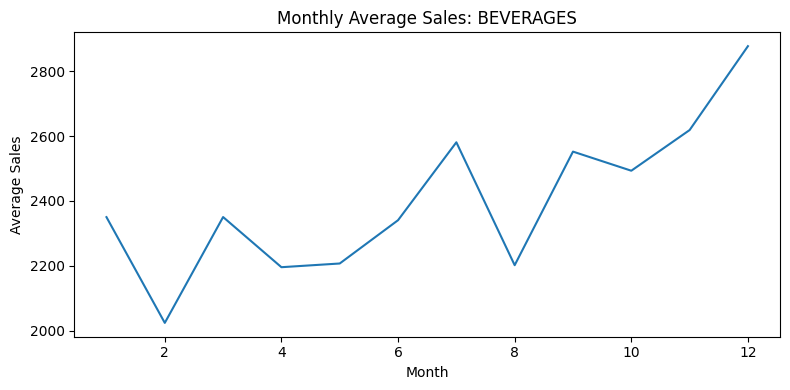

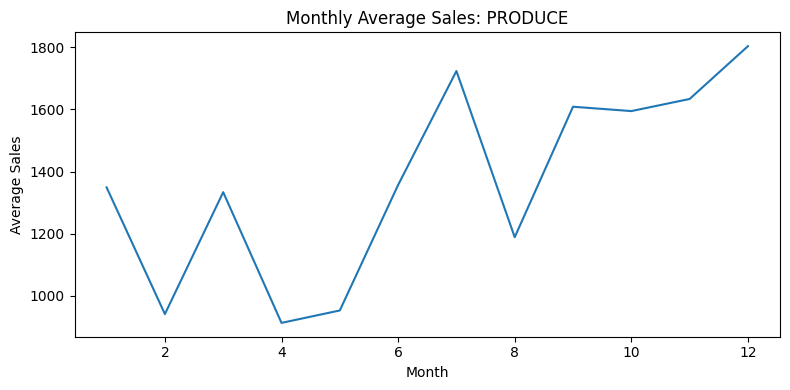

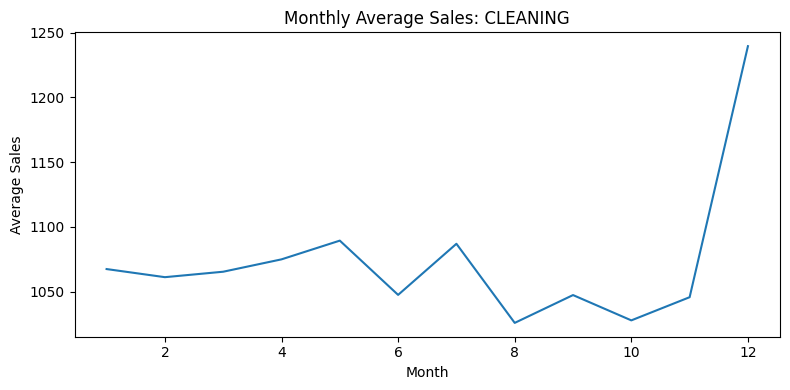

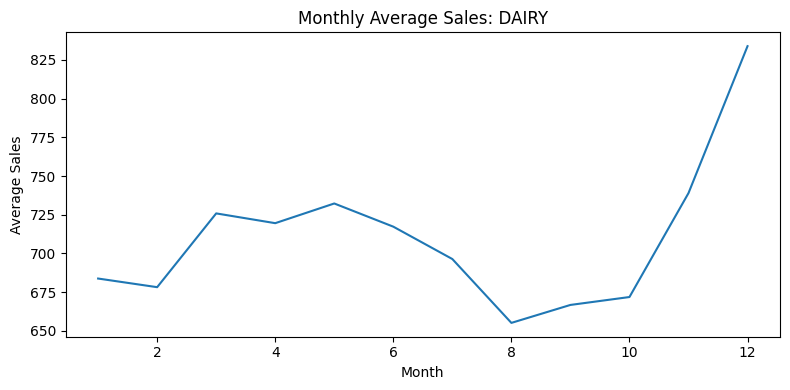

In [30]:
# Seasonal Patterns within Product Families
for family in top_families:
    df_sub = train_df[train_df['family'] == family]
    monthly = df_sub.groupby('month')['sales'].mean().reset_index()
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=monthly, x='month', y='sales')
    plt.title(f'Monthly Average Sales: {family}')
    plt.xlabel('Month')
    plt.ylabel('Average Sales')
    plt.tight_layout()
    plt.show()


In [31]:
# Volatility or Variability Check
family_stats = train_df.groupby('family')['sales'].agg(['mean', 'std']).reset_index()
family_stats['cv'] = family_stats['std'] / family_stats['mean']
family_stats = family_stats.sort_values(by='cv', ascending=False)

print(family_stats.head(10))

                        family        mean         std        cv
4                        BOOKS    0.070797    0.547981  7.740162
31  SCHOOL AND OFFICE SUPPLIES    2.961599   21.745937  7.342633
1                    BABY CARE    0.110528    0.681064  6.161901
17             HOME APPLIANCES    0.457476    0.969551  2.119350
11                FROZEN FOODS  154.766954  324.971305  2.099746
23                   MAGAZINES    2.929082    6.008492  2.051323
20             LAWN AND GARDEN    6.035475   12.283458  2.035210
26                PET SUPPLIES    3.921263    7.657852  1.952904
19                  LADIESWEAR    7.160629   13.946302  1.947636
6                  CELEBRATION    8.370469   15.927114  1.902774


## Step 8: Effect of Promotions

In [32]:
#  Compare Sales with and without Promotions (Overall)
import plotly.express as px

# Average sales based on promotion status
promo_impact = train_df.groupby('onpromotion')['sales'].mean().reset_index()

# Replace 0 and 1 with labels for clarity
promo_impact['onpromotion'] = promo_impact['onpromotion'].map({0: 'No Promo', 1: 'Promo'})

# Create Plotly bar chart
fig = px.bar(
    promo_impact,
    x='onpromotion',
    y='sales',
    text='sales',
    color='onpromotion',
    color_discrete_map={'No Promo': 'lightgray', 'Promo': 'skyblue'},
    title='Average Sales: With vs Without Promotion',
    labels={'onpromotion': 'Promotion Status', 'sales': 'Average Sales'}
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    yaxis_title='Average Sales',
    xaxis_title='Promotion Status',
    showlegend=False,
    height=500,
    width=700
)

fig.show()



In [33]:
# Promotion Impact by Product Family
import pandas as pd
import plotly.graph_objects as go

# Group by family and promotion status to calculate average sales
promo_by_family = train_df.groupby(['family', 'onpromotion'])['sales'].mean().reset_index()

# Pivot the data for plotting
promo_pivot = promo_by_family.pivot(index='family', columns='onpromotion', values='sales')

# Ensure both promotion values exist
if 0.0 not in promo_pivot.columns:
    promo_pivot[0.0] = 0
if 1.0 not in promo_pivot.columns:
    promo_pivot[1.0] = 0

# Sort by sales under promotion
promo_pivot = promo_pivot.sort_values(by=1.0, ascending=False)

# Plot with Plotly
fig = go.Figure(data=[
    go.Bar(name='No Promotion', x=promo_pivot.index, y=promo_pivot[0.0]),
    go.Bar(name='Promotion', x=promo_pivot.index, y=promo_pivot[1.0])
])

fig.update_layout(
    barmode='group',
    title='Average Sales by Product Family: Promotion vs No Promotion',
    xaxis_title='Product Family',
    yaxis_title='Average Sales',
    xaxis_tickangle=45
)

fig.show()



## Step 9: Enrich Dataset with External Metadata  

In [34]:
# Ensure datetime types
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
oil_df['date'] = pd.to_datetime(oil_df['date'])
holidays_df['date'] = pd.to_datetime(holidays_df['date'])
transactions_df['date'] = pd.to_datetime(transactions_df['date'])

# 1. Merge store metadata (no column name conflict expected)
train_df = train_df.merge(stores_df, on='store_nbr', how='left')
test_df = test_df.merge(stores_df, on='store_nbr', how='left')

# 2. Merge oil prices (keep only 'date' and 'dcoilwtico')
oil_df_reduced = oil_df[['date', 'dcoilwtico']]
train_df = train_df.merge(oil_df_reduced, on='date', how='left')
test_df = test_df.merge(oil_df_reduced, on='date', how='left')

# 3. Merge holiday info (drop columns already in train_df if necessary)
holidays_df_reduced = holidays_df[['date', 'type', 'locale', 'locale_name', 'description', 'transferred']]
train_df = train_df.merge(holidays_df_reduced, on='date', how='left')
test_df = test_df.merge(holidays_df_reduced, on='date', how='left')

# 4. Merge transactions (only available for train_df)
train_df = train_df.merge(transactions_df[['date', 'store_nbr', 'transactions']], on=['date', 'store_nbr'], how='left')



## Step 10: Correlation, Seasonality, and Trend Analysis



### Step 10.1: Correlation Analysis

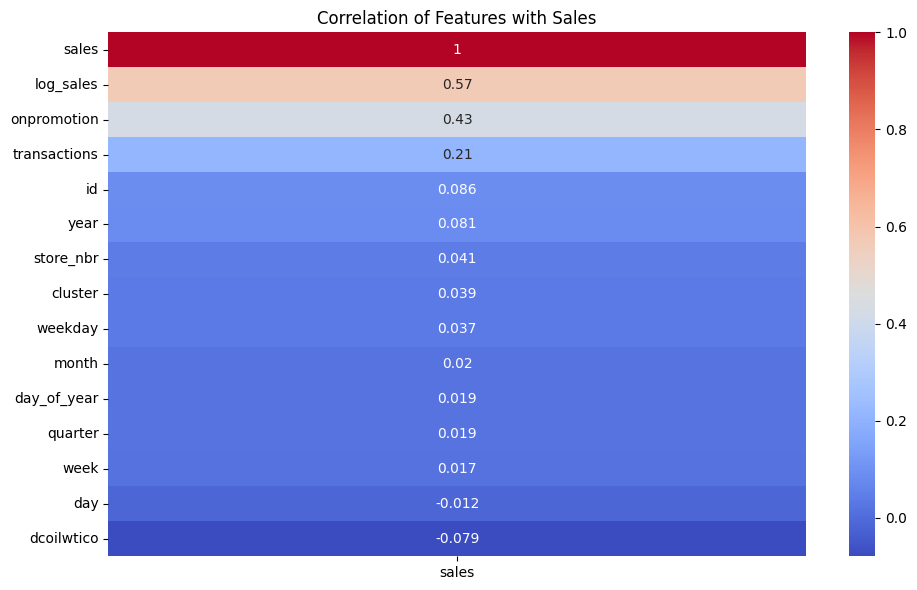

In [35]:
# Select only numeric columns
numeric_cols = train_df.select_dtypes(include='number')

# Compute correlation matrix
correlation = numeric_cols.corr()

# Visualize correlation with sales
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation[['sales']].sort_values(by='sales', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Sales')
plt.tight_layout()
plt.show()


### Step 10.2: Seasonality Detection (Weekly and Monthly)



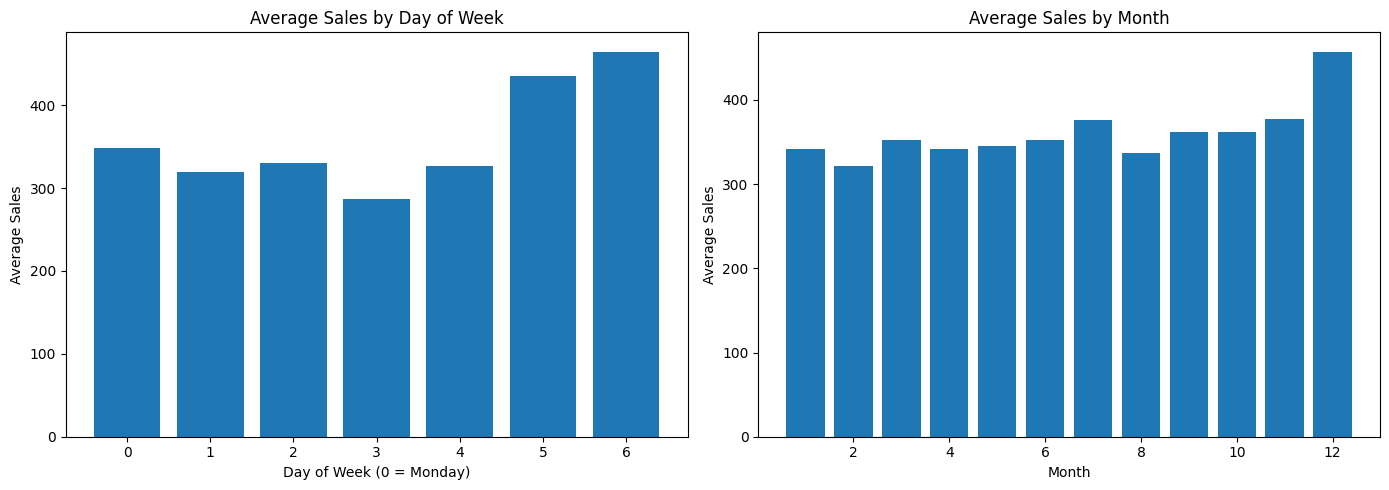

In [36]:
# Extract time features
train_df['dayofweek'] = train_df['date'].dt.dayofweek
train_df['month'] = train_df['date'].dt.month

# Weekly pattern
weekly_sales = train_df.groupby('dayofweek')['sales'].mean()

# Monthly pattern
monthly_sales = train_df.groupby('month')['sales'].mean()

# Plot weekly and monthly seasonality
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].bar(weekly_sales.index, weekly_sales.values)
axs[0].set_title('Average Sales by Day of Week')
axs[0].set_xlabel('Day of Week (0 = Monday)')
axs[0].set_ylabel('Average Sales')

axs[1].bar(monthly_sales.index, monthly_sales.values)
axs[1].set_title('Average Sales by Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Average Sales')

plt.tight_layout()
plt.show()


### Step 10.3: Long-Term Trend Analysis

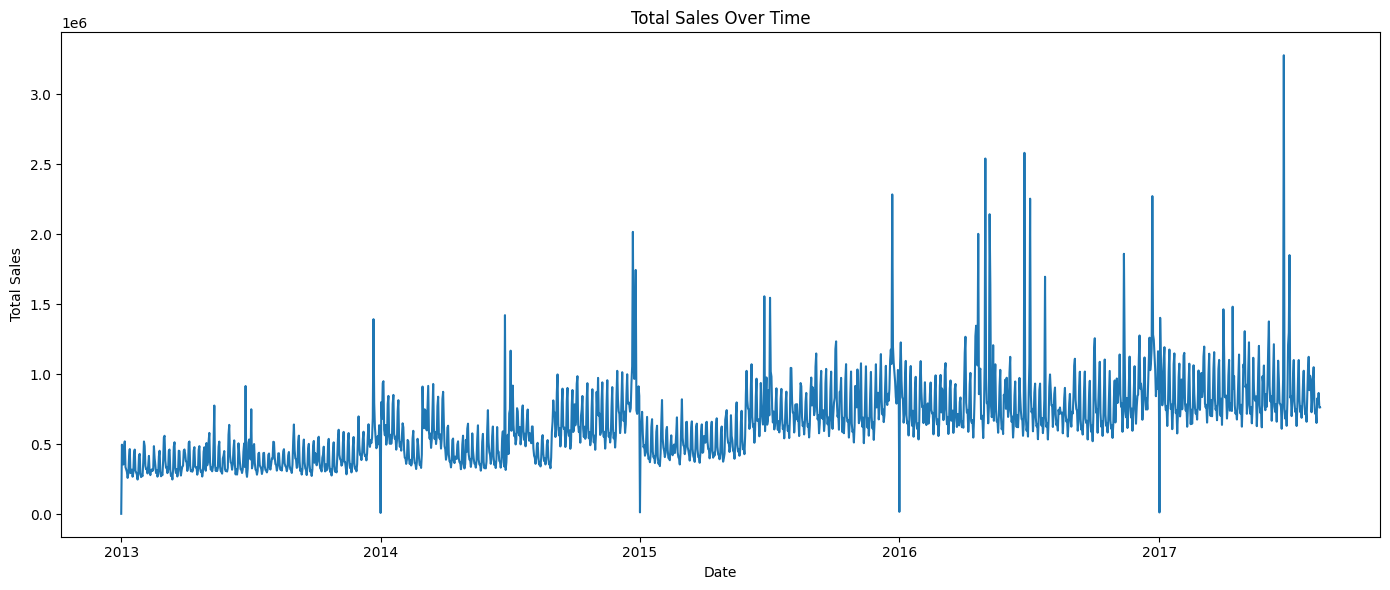

In [37]:
# Aggregate daily sales
daily_sales = train_df.groupby('date')['sales'].sum().reset_index()

# Plot trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sales, x='date', y='sales')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


## Step 11: Outlier Detection and Modeling Insights


### Step 11.1: Outlier Detection in Sales

In [38]:
# Ensure 'sales' is aggregated daily
daily_sales = train_df.groupby('date')['sales'].sum().reset_index()

# Compute rolling statistics
daily_sales['rolling_mean'] = daily_sales['sales'].rolling(window=7, center=True).mean()
daily_sales['rolling_std'] = daily_sales['sales'].rolling(window=7, center=True).std()

# Define outlier bounds
daily_sales['upper_bound'] = daily_sales['rolling_mean'] + 2 * daily_sales['rolling_std']
daily_sales['lower_bound'] = daily_sales['rolling_mean'] - 2 * daily_sales['rolling_std']

# Mark outliers
daily_sales['is_outlier'] = (daily_sales['sales'] > daily_sales['upper_bound']) | (daily_sales['sales'] < daily_sales['lower_bound'])


In [39]:
import plotly.graph_objects as go

# Create base figure
fig = go.Figure()

# Sales line
fig.add_trace(go.Scatter(
    x=daily_sales['date'],
    y=daily_sales['sales'],
    mode='lines',
    name='Sales',
    line=dict(color='blue')
))

# Rolling mean
fig.add_trace(go.Scatter(
    x=daily_sales['date'],
    y=daily_sales['rolling_mean'],
    mode='lines',
    name='7-day Rolling Mean',
    line=dict(color='orange', dash='dash')
))

# Outlier band (fill between lower and upper bound)
fig.add_trace(go.Scatter(
    x=daily_sales['date'].tolist() + daily_sales['date'][::-1].tolist(),
    y=daily_sales['upper_bound'].tolist() + daily_sales['lower_bound'][::-1].tolist(),
    fill='toself',
    fillcolor='rgba(150,150,150,0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    name='Outlier Band'
))

# Outliers
outliers = daily_sales[daily_sales['is_outlier']]
fig.add_trace(go.Scatter(
    x=outliers['date'],
    y=outliers['sales'],
    mode='markers',
    name='Outliers',
    marker=dict(color='red', size=8)
))

# Layout
fig.update_layout(
    title='Outlier Detection in Sales Over Time',
    xaxis_title='Date',
    yaxis_title='Sales',
    legend=dict(x=0.01, y=0.99),
    template='plotly_white',
    height=500,
    width=1000
)

fig.show()


### Step 11.2: Explain Outliers Using Holidays or Promotions

In [40]:
# Filter outlier dates from train_df
outlier_context = train_df[train_df['date'].isin(daily_sales[daily_sales['is_outlier']]['date'])]

# Select only available context columns
available_cols = ['date', 'store_nbr', 'sales']
if 'onpromotion' in train_df.columns:
    available_cols.append('onpromotion')
if 'description' in train_df.columns:
    available_cols.append('description')
if 'locale_name' in train_df.columns:
    available_cols.append('locale_name')
if 'dcoilwtico' in train_df.columns:
    available_cols.append('dcoilwtico')
if 'transactions' in train_df.columns:
    available_cols.append('transactions')

# Display sample
outlier_context = outlier_context[available_cols]
outlier_context = outlier_context.drop_duplicates(subset=['date'] + [col for col in ['description', 'locale_name'] if col in available_cols])
outlier_context.sort_values(by='date').head(10)


,date,store_nbr,sales,onpromotion,description,locale_name,dcoilwtico,transactions
233442,2013-05-12,1,1.0,0,Cantonizacion del Puyo,Puyo,NaN,549.0
233443,2013-05-12,1,1.0,0,Dia de la Madre,Ecuador,NaN,549.0
313632,2013-06-25,1,2.0,0,Provincializacion de Imbabura,Imbabura,95.25,1718.0
313633,2013-06-25,1,2.0,0,Fundacion de Machala,Machala,95.25,1718.0
313634,2013-06-25,1,2.0,0,Cantonizacion de Latacunga,Latacunga,95.25,1718.0
639738,2013-12-22,1,0.0,0,Navidad-3,Ecuador,NaN,1093.0
639739,2013-12-22,1,0.0,0,Cantonizacion de Salinas,Salinas,NaN,1093.0
887436,2014-05-10,1,5.0,0,Dia de la Madre-1,Ecuador,NaN,1440.0
949806,2014-06-14,1,0.0,0,NaN,NaN,NaN,1447.0
969411,2014-06-25,1,1.0,0,Mundial de futbol Brasil: Ecuador-Francia,Ecuador,107.04,1747.0


### Step 11.3: Summarize Modeling Insights

In [41]:
# Summary of useful predictors
important_features = correlation['sales'].sort_values(ascending=False).drop('sales')

print("Top predictive features based on correlation:")
print(important_features.head(5))

print("\nObservations:")
print("- Promotions and transactions are strongly correlated with sales")
print("- Weekly and monthly seasonality detected")
print("- Outliers often correspond to holidays or special events")


Top predictive features based on correlation:
log_sales       0.565812
onpromotion     0.428241
transactions    0.214848
id              0.086102
year            0.081320
Name: sales, dtype: float64

Observations:
- Promotions and transactions are strongly correlated with sales
- Weekly and monthly seasonality detected
- Outliers often correspond to holidays or special events


## Step 12: Data Preprocessing

In [42]:
print(train_df.shape )
train_df.columns

(3054348, 27)


Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year',
       'month', 'day', 'weekday', 'week', 'quarter', 'day_of_year',
       'is_weekend', 'log_sales', 'city', 'state', 'type_x', 'cluster',
       'dcoilwtico', 'type_y', 'locale', 'locale_name', 'description',
       'transferred', 'transactions', 'dayofweek'],
      dtype='object')

In [43]:
print(test_df.shape)
test_df.columns

(28512, 23)


Index(['id', 'date', 'store_nbr', 'family', 'onpromotion', 'year', 'month',
       'day', 'weekday', 'week', 'quarter', 'day_of_year', 'is_weekend',
       'city', 'state', 'type_x', 'cluster', 'dcoilwtico', 'type_y', 'locale',
       'locale_name', 'description', 'transferred'],
      dtype='object')

In [44]:
from sklearn.preprocessing import LabelEncoder

# Combine train and test for consistent encoding
full_df = pd.concat([train_df, test_df], sort=False)

# Identify categorical columns
cat_cols = full_df.select_dtypes(include='object').columns

# Apply Label Encoding
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    full_df[col] = le.fit_transform(full_df[col].astype(str))
    label_encoders[col] = le

# Split back to train and test
train_df = full_df.iloc[:len(train_df)].copy()
test_df = full_df.iloc[len(train_df):].copy()


# Step 13: Feature Engineering

In [45]:
# Drop columns we don't need
drop_cols = ['id', 'sales', 'log_sales', 'date', 'description']
feature_cols = [col for col in train_df.columns if col not in drop_cols]

# Create X and y
X = train_df[feature_cols]
y = train_df['sales']

# Test set
X_test = test_df[feature_cols]


In [46]:
# # Drop columns not needed for training
# drop_cols = ['id', 'sales', 'log_sales', 'date']  # 'log_sales' is often used as target too
# feature_cols = [col for col in train_df.columns if col not in drop_cols]

# # Define features and target
# X = train_df[feature_cols]
# y = train_df['sales']  # or use 'log_sales' if you're modeling on log scale

# # For test set (no 'sales')
# X_test = test_df[feature_cols]


In [47]:
# stationarity check on data
# from statsmodels.tsa.stattools import adfuller
# def adf_test(train_dfdf):
#     result = adfuller(train_dfdf)
#     print('ADF Statistic: %f' % result[0])
#     print('p-value: %f' % result[1])
#     if result[1] <= 0.05:
#         print("Reject the null hypothesis. Data is stationary")
#     else:
#         print("Fail to reject the null hypothesis. Data is not stationary")

# adf_test(train_df['sales'])

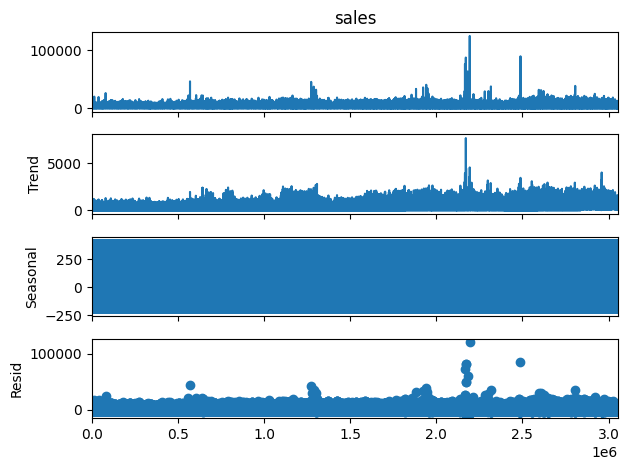

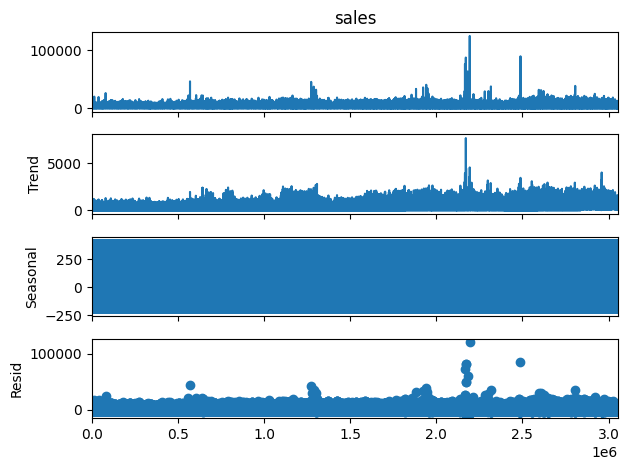

In [50]:
# decompose the data to see the trend, seasonality and noise
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(train_df['sales'], model='additive', period=30)
decompose.plot()

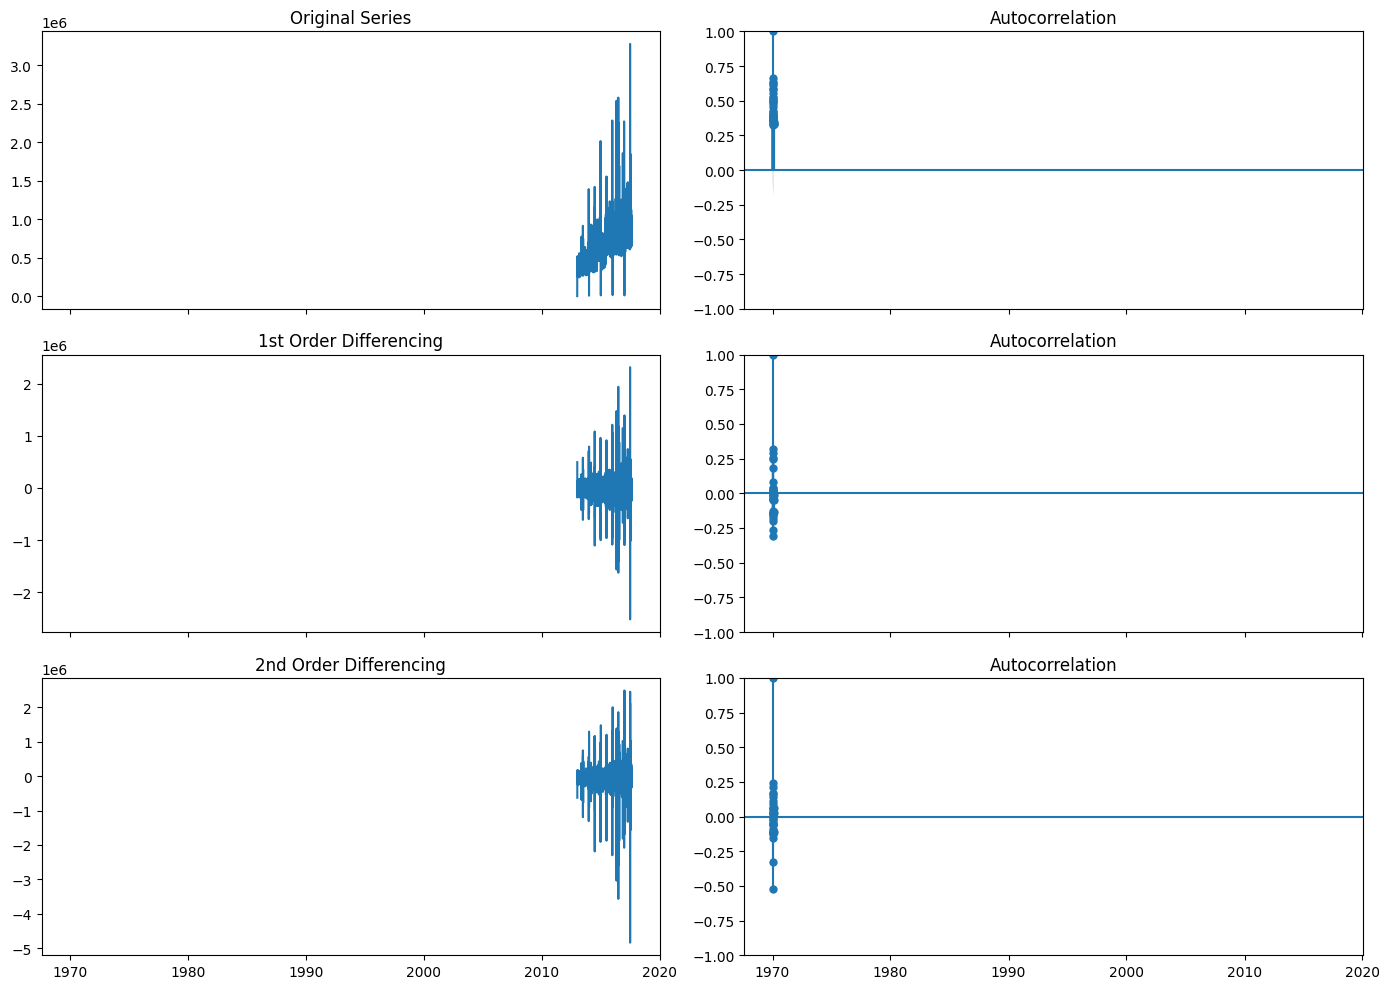

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Ensure 'date' is datetime and sort
train_df['date'] = pd.to_datetime(train_df['date'])
daily_sales = train_df.groupby('date')['sales'].sum().sort_index()

# Create plot
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)

# Original series
axes[0, 0].plot(daily_sales)
axes[0, 0].set_title('Original Series')
plot_acf(daily_sales, ax=axes[0, 1])

# 1st differencing
first_diff = daily_sales.diff().dropna()
axes[1, 0].plot(first_diff)
axes[1, 0].set_title('1st Order Differencing')
plot_acf(first_diff, ax=axes[1, 1])

# 2nd differencing
second_diff = daily_sales.diff().diff().dropna()
axes[2, 0].plot(second_diff)
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(second_diff, ax=axes[2, 1])

plt.tight_layout()
plt.show()


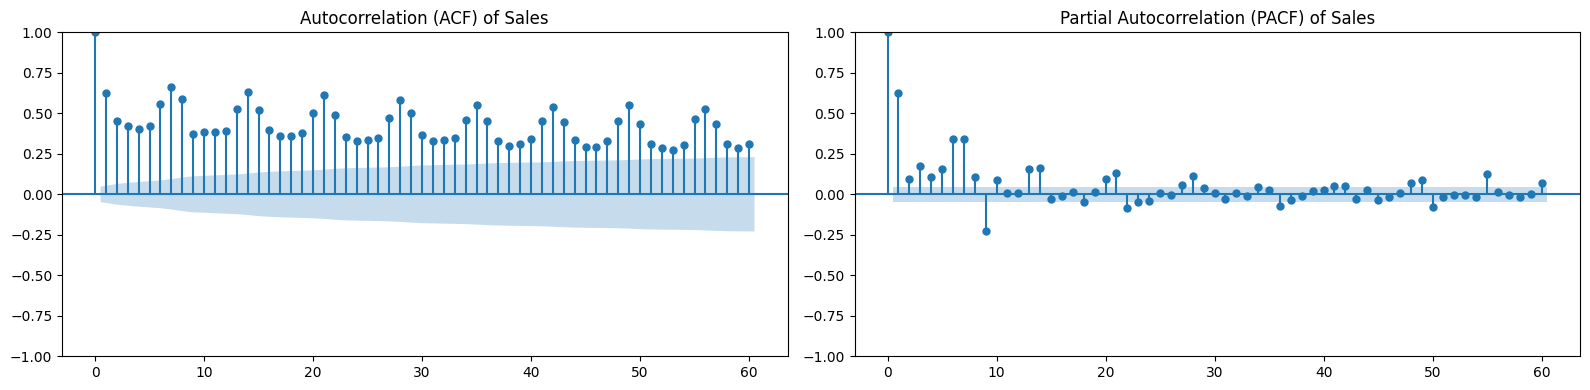

ACF values:
         ACF
0  1.000000
1  0.627406
2  0.451697
3  0.422628
4  0.402912
5  0.420839
6  0.556977
7  0.664061
8  0.585907
9  0.371010
PACF values:
        PACF
0  1.000000
1  0.627778
2  0.095938
3  0.177388
4  0.105893
5  0.154450
6  0.342413
7  0.345483
8  0.107929
9 -0.225768


In [52]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Make sure your data is sorted by date
train_df = train_df.sort_values('date')

# Aggregate daily sales (if not already)
daily_sales = train_df.groupby('date')['sales'].sum().reset_index()

# Optionally convert to time series with datetime index
daily_sales.set_index('date', inplace=True)

# Extract sales series
sales_series = daily_sales['sales']

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(sales_series, lags=60, ax=axes[0])
axes[0].set_title('Autocorrelation (ACF) of Sales')

plot_pacf(sales_series, lags=60, ax=axes[1])
axes[1].set_title('Partial Autocorrelation (PACF) of Sales')

plt.tight_layout()
plt.show()

# Compute raw ACF and PACF values as DataFrames
acf_vals = pd.DataFrame(acf(sales_series, nlags=60), columns=['ACF'])
pacf_vals = pd.DataFrame(pacf(sales_series, nlags=60), columns=['PACF'])

print("ACF values:\n", acf_vals.head(10))
print("PACF values:\n", pacf_vals.head(10))


# Model Buiding

In [ ]:
X.columns

Index(['store_nbr', 'family', 'onpromotion', 'year', 'month', 'day', 'weekday',
       'week', 'quarter', 'day_of_year', 'is_weekend', 'city', 'state',
       'type_x', 'cluster', 'dcoilwtico', 'type_y', 'locale', 'locale_name',
       'transferred', 'transactions', 'dayofweek'],
      dtype='object')

In [54]:
X.head()

,store_nbr,family,onpromotion,year,month,day,weekday,week,quarter,day_of_year,...,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,transferred,transactions,dayofweek
0,1,0,0,2013,1,1,1,1,1,1,...,12,3,13,93.14,3,1,4,0,NaN,1.0
1,1,1,0,2013,1,1,1,1,1,1,...,12,3,13,93.14,3,1,4,0,NaN,1.0
2,1,2,0,2013,1,1,1,1,1,1,...,12,3,13,93.14,3,1,4,0,NaN,1.0
3,1,3,0,2013,1,1,1,1,1,1,...,12,3,13,93.14,3,1,4,0,NaN,1.0
4,1,4,0,2013,1,1,1,1,1,1,...,12,3,13,93.14,3,1,4,0,NaN,1.0


In [55]:
y.shape

(3054348,)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Sort by date (very important)
train_df = train_df.sort_values(by=['store_nbr', 'family', 'date'])

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

SEQ_LEN = 30  # 30 timesteps of history

def create_sequences(X, y=None, seq_len=30):
    Xs, ys = [], []
    for i in range(len(X) - seq_len):
        Xs.append(X[i:i+seq_len])
        if y is not None:
            ys.append(y[i+seq_len])
    if y is not None:
        return np.array(Xs), np.array(ys)
    else:
        return np.array(Xs)

X_seq, y_seq = create_sequences(X_scaled, y, SEQ_LEN)
X_test_seq = create_sequences(X_test_scaled, seq_len=SEQ_LEN)

print(X_seq.shape)  # (samples, timesteps, features)
print(y_seq.shape)  # (samples,)


In [ ]:
import numpy as np

# X_seq shape: (N, seq_len, n_features)
N = X_seq.shape[0]
train_frac = 0.8
train_end = int(N * train_frac)

X_train = X_seq[:train_end]
y_train = y_seq[:train_end]
X_val   = X_seq[train_end:]
y_val   = y_seq[train_end:]

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)


(2400686, 30, 3) (2400686,) (600172, 30, 3) (600172,)


In [ ]:
import tensorflow as tf

BATCH_SIZE = 1024  # tune based on GPU memory
AUTOTUNE = tf.data.AUTOTUNE

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.batch(BATCH_SIZE).cache().prefetch(AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_ds = val_ds.batch(BATCH_SIZE).cache().prefetch(AUTOTUNE)

2025-08-10 10:17:46.862823: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1728493920 exceeds 10% of free system memory.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

seq_len = X_seq.shape[1]
n_features = X_seq.shape[2]

def build_gru_model(seq_len, n_features, gru_units=(128,64), dropout=0.2):
    model = Sequential()
    model.add(GRU(gru_units[0], return_sequences=True, input_shape=(seq_len, n_features)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))

    model.add(GRU(gru_units[1]))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))

    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))  # regression
    return model

model = build_gru_model(seq_len, n_features)
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])
model.summary()


/home/dark/miniconda3/envs/tf_env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 30, 128)        │        51,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,313 (364.50 KB)

 Trainable params: 92,929 (363.00 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

ckpt_path = "gru_best.h5"
callbacks = [
    EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1),
    ModelCheckpoint(ckpt_path, monitor='val_loss', save_best_only=True, verbose=1)
]

EPOCHS = 30

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=2
)


In [ ]:
y_pred_test = model.predict(X_test_seq, batch_size=BATCH_SIZE)
# y_pred_test is raw sales predictions


In [ ]:
# After predict:
y_pred_log = model.predict(X_test_seq, batch_size=BATCH_SIZE)
y_pred_sales = np.expm1(y_pred_log.ravel())   # use ravel() if shape is (N,1)
 

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmse(y_true, y_pred): return np.sqrt(mean_squared_error(y_true, y_pred))
def mae(y_true, y_pred): return mean_absolute_error(y_true, y_pred)

# if log target used:
# y_val_true = np.expm1(y_val)
# y_val_pred  = np.expm1(model.predict(X_val))

y_val_pred = model.predict(X_val).ravel()
print("Val RMSE:", rmse(y_val, y_val_pred))
print("Val MAE:", mae(y_val, y_val_pred))
